# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD12
Członkowie: Izabela Karczewska 409957, Natalia Kołodziejczyk 409695, Natalia Kubańska 411933

---

## Zestaw zadań 4: Wybrane teoretyczne rozkłady prawdopodobieństwa oraz elementy teorii estymacji (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku zadaniach i komórkach testowych wykonaj poniższe komórki.

In [2]:
# Dane do testów 1
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=20, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [3]:
# Dane do testów 2
x = sp.stats.uniform.rvs(loc=-2, scale=10, size=25, random_state=34)
y = 2*x - 5 + sp.stats.norm.rvs(loc=0, scale=2, size=25, random_state=13)
test_data_2 = pd.DataFrame(data=np.array([x, y]).T, columns=["x", "y"])
test_data_2.head()

,x,y
0,-1.614383,-9.653548
1,5.801005,8.109542
2,-1.072962,-7.234931
3,4.328927,4.561478
4,-1.861092,-6.031980


In [4]:
# Dane do zadania 7
x = sp.stats.uniform.rvs(loc=-3, scale=12, size=50, random_state=18)
y = -1.25*x + 7 + sp.stats.norm.rvs(loc=0, scale=3, size=50, random_state=67)
data = pd.DataFrame(data=np.array([x, y]).T, columns=["x", "y"])
data.head()

,x,y
0,4.804491,4.379953
1,3.065440,3.600776
2,7.543218,-5.774798
3,-0.817917,11.715536
4,7.226797,-2.497470


### Zadanie 7: Estymacja przedziałowa funkcji regresji liniowej [12 pkt]

#### a ) Przygotowanie funkcji
Przygotuj funkcję `linear_regression_estimation()`, która będzie dokonywała estymacji przedziału ufności i przedziału predykcji regresji liniowej dla danych wejściowych w postaci szeregu szczegółowego.
Zaprojektuj funkcję w taki sposób, aby obliczała wartości przedziałów dla 100 wartości x równo rozłożonych od minimalnej do maksymalnej wartości x z danych wejściowych.

In [5]:
def linear_regression_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i dwie kolumny "x" i "y" z wynikami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    Returns
    -------
    a: float
        Współczynnik równania regresji (slope).
    b: float
        Współczynnik równania regresji (intercept).
    results: DataFrame
        Tablica zawierająca domyślny indeks oraz następujące kolumny:
        x - wartości zmiennej niezależnaj, dla których określamy granice przedziału,
        y_reg - wartości y wyliczone na podstawie wartości x z wykorzystaniem wyliczonego równania regresji liniowej,
        ci_high - górne granice przedziału ufności,
        ci_low - dolne granice przedziału ufności,
        pi_high - górne granice przedziału predykcji,
        pi_low - dolne granice przedziału predykcji.
    """  
    # YOUR CODE HERE
    n = len(data)
    res = sp.stats.linregress(data.x, data.y)
    a, b = res.slope, res.intercept 
    y_pred= a * data.x + b 
    su = np.sqrt(np.sum((data.y - y_pred)**2) /  (n - 2))

    x = np.linspace(data.x.min(), data.x.max(), 100)

    dy = su * np.sqrt(   1 + 1/n  + (( x - data.x.mean())**2 /  np.sum( (data.x -data.x.mean() )**2  ) ))
    dy_reg = su * np.sqrt( 1/n  + (( x - data.x.mean())**2 /  np.sum( (data.x -data.x.mean() )**2  ) ))
    
    t = sp.stats.t.ppf(1-alpha/2, n-2)
    
    y_reg = a * x + b 
    pi_high = y_reg + t*dy
    pi_low = y_reg - t*dy

    ci_high = y_reg + t*dy_reg 
    ci_low = y_reg - t*dy_reg 

    results = pd.DataFrame(data = {'x' : x, 'y_reg': y_reg , 'ci_high': ci_high,'ci_low': ci_low, 'pi_high':pi_high, 'pi_low': pi_low})
    
    return a,b, results

In [6]:
### Komórka testowa
a, b , results = linear_regression_estimation(test_data_2, 0.05)
assert np.isclose(a, 2.072171435240703)
assert np.isclose(b, -4.6260980900060495)
assert results.shape == (100, 6)
assert len(set(list(results.columns)) & set(['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low'])) == 6
assert np.all(np.isclose(results[['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low']].min().values, np.array([-1.8657939, -8.49234292, -7.06370958, -9.92097626, -4.39199716, -12.59268868]))) == True
assert np.all(np.isclose(results[['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low']].max().values, np.array([7.4114666, 10.73173129, 12.12260347, 9.34085912, 14.81907365, 6.64438894]))) == True
assert np.all(np.isclose(results[['x', 'y_reg', 'ci_high', 'ci_low', 'pi_high', 'pi_low']].mean().values, np.array([2.77283635, 1.11969419, 2.13259929, 0.10678908, 5.09904685, -2.85965848]))) == True

#### b) Wykres 

Wykorzystaj przygotowaną funkcję do wyznaczenia przedziałów na danych ze zmiennej `data` i przedstaw wyniki na pojedynczym wykresie. W obliczeniach przyjmij wybrany przez siebie poziom istotności. 

Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- zawrzyj na wykresie punkty, na których była prowadzona analiza, prostą regresji, granice przedziału ufności oraz granice przedziału predykcji,
- wyróżnij poszczególne elementy wykresu (w tym znajdujące się na nim punkty) różnymi kolorami (granice poszczególnych przedziałów w tym samym kolorze) i formamy linii (ciągła dla prostej regresjii, przerywane dla granic przedziałów),
- dodaj do figury legendę opisującą wszystkie elementy wykresu. Umieść w legendzie informację o wyznaczonym równaniu regresji (współczynniki sformatowane do 4 miejsc po przecinku) oraz wartości współczynnika ufności (sformatowane do 3 miejsc po przecinku) dla którego były wyznaczane przedziały.

C:\Users\Iza\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Iza\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Iza\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Iza\anaconda3\envs\DataScience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

<Axes: title={'center': 'Linear regression estimation plot'}, xlabel='X', ylabel='Y'>

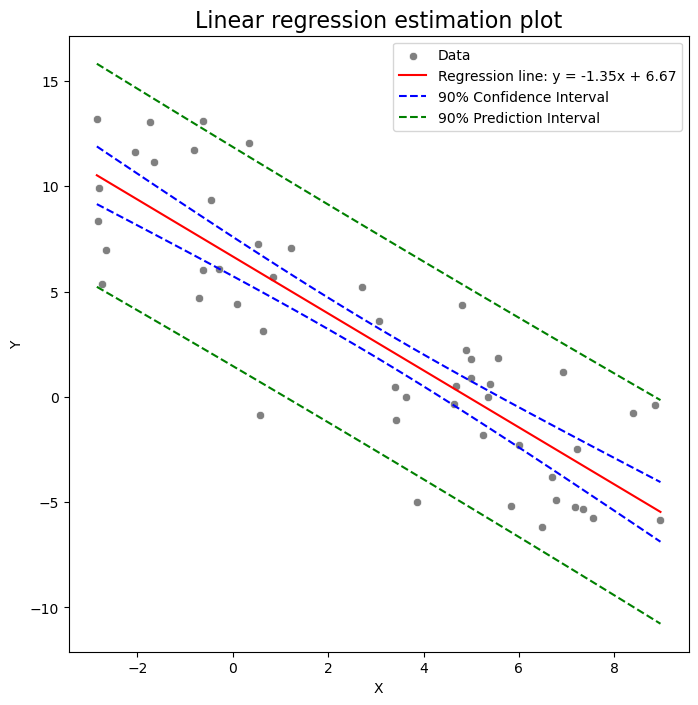

In [23]:
# Wykres
a,b, results = linear_regression_estimation(data, 0.1)
plt.figure(figsize=(8,8))
plt.title("Linear regression estimation plot", fontsize=16)
plt.xlabel("X")
plt.ylabel("Y")
sns.scatterplot(data, x="x", y="y",  color='gray', label="Data")
sns.lineplot(results, x="x", y="y_reg", color='red', label=f'Regression line: y = {a:.2f}x + {b:.2f}')

sns.lineplot(data=results, x="x", y="ci_high", color='blue', linestyle='--', label='90% Confidence Interval')
sns.lineplot(data=results, x="x", y="ci_low", color='blue', linestyle='--')

sns.lineplot(data=results, x="x", y="pi_high", color='green', linestyle='--', label='90% Prediction Interval')
sns.lineplot(data=results, x="x", y="pi_low", color='green', linestyle='--')

### Zadanie 8: Estymacja bootstapowa parametrów próby losowej [7 pkt]

Przygotuj funkcję `bootstrap_parameter_estimation()`, która korzystając z metody bootstrap będzie dokonywała estymacji przedziałowej podstawowych parametrów próby losowej - wartości oczekiwanej, wariancji i odchylenia standardowego dla danych wejściowych w postaci szeregu szczegółowego zgodnie ze schematem z załączonego do notatnika zestawu wzorów.

W obliczeniach skorzystaj z nieobciążonych estymatorów wariancji i odchylenia standardowego.

Oprócz zwracanych wartości granic przedziału funkcja powinna wyświetlać następujący komunikat:

`P należy do przedziału [X, Y] przy założeniu poziomu ufności 1-𝛼 = Z`

gdzie P (symbol lub nazwa estymowanego parametru), X, Y i Z są automatycznie uzupełniane przez funkcję, a X i Y dodatkowo sformatowane w taki sposób, żeby wyświetlały się z dokładnością do 4 miejsc po przecinku.

Uwagi do wykonania zadania:
 - Automatyczne testy zakładają losowanie prób wg następującego schematu - kolejne próby są losowane w pęli for, a funkcja losująca próbę (np. `pd.sample()`) w kolejnych losowaniach ma ustawioną wartość parametru odpowiadającego za ziarno generatora liczb losowych na wartość `random_state`, `random_state+1`, `random_state+2` itd. 
 - Celem zadania jest napisanie funkcji od podstaw, w rozwiązaniu nie należy korzystać z gotowych funkcji służących do estymacji bootstrapowej.

In [ ]:
def bootstrap_parameter_estimation(data, parameter, number_of_samples, alpha, random_state):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    parameter: str
        W zależności od estymowanego parametru przyjmuje wartość "mean", "var" lub "std".
    number_of_samples: int
        Liczba prób bootstrapowych.
    alpha: float
        Wartość określająca poziom istotności.
    random_state: int
        Ziarno generatora liczb pseudolosowych.
    
    Returns
    -------
    parameter_low: float
        Dolna granica wyliczonego przedziału ufności.
    parameter_high: float
        Górna granica wyliczonego przedziału ufności.
    """       
    # YOUR CODE HERE
    calc = np.array([])
    for m in range(number_of_samples):
        sampled = data.sample(n = len(data), replace = True, random_state = random_state + m)
        if parameter == 'mean':
            calc= np.append(calc,  sampled.mean())
        elif parameter == 'var':
            calc = np.append(calc,  sampled.var())
        else:
            calc = np.append(calc,  sampled.std())
       

    parameter_low  = np.quantile(calc, alpha /2)
    parameter_high = np.quantile(calc, 1 - alpha /2)
    return parameter_low, parameter_high
    
    
            
            
            
            
        
        

In [ ]:
# Komórka testowa
assert np.all(np.isclose(bootstrap_parameter_estimation(test_data_1, "mean", 1000, 0.05, 34), (4.913578501079754, 5.058598650238277)))
assert np.all(np.isclose(bootstrap_parameter_estimation(test_data_1, "var", 2000, 0.02, 31), (0.009780029754528753, 0.05012098474121563)))
assert np.all(np.isclose(bootstrap_parameter_estimation(test_data_1, "std", 1500, 0.1, 39), (0.11848597559111698, 0.20690074715252046)))

### Zadanie 9: Estymacja bootstrapowa za pomocą dedykowanych funkcji [6 pkt]

Korzystając z funkcji `scipy.stats.bootstrap()` dokonaj estymacji przedziałowej następujących parametrów na poziomie istotności 1-alpha = 0.98:
 - na podstawie zmiennej `test_data_1`: średnia, wariancja, odchylenie standardowe,
 - na podstawie zmiannej `test_data_2`: współczynnik korelacji liniowej Pearsona, współczynniki równania regresji liniowej a i b.
 
Wyniki zapisz do zmiennych o nazwach `mean_ci`, `var_ci`, `std_ci`, `r_ci`, `a_ci` oraz `b_ci` zawierających listy z dolnymi i górnymi granicami przedziałów ufności. Podczas obliczania wartości każdego z parametrów ustaw wartość argumentu funkcji `scipy.stats.bootstrap()` odpowiadającego za ziarno generatora liczb losowych na 25.

Uwagi do wykonania zadania:
 - Automatyczne testy przewidują obliczenie wartości wariancji i odchylenia standardowego dla wartości parametru `ddof=0`.

In [ ]:
test_data_1 = (test_data_1, )

In [ ]:
# mean
# YOUR CODE HERE
mean_ci = sp.stats.bootstrap(test_data_1, np.mean, random_state = 25, confidence_level = 0.98)
mean_ci = [mean_ci.confidence_interval.low[0], mean_ci.confidence_interval.high[0]]

In [ ]:
# var
# YOUR CODE HERE
var_ci = sp.stats.bootstrap(test_data_1, np.var, random_state = 25, confidence_level = 0.98)
var_ci = [var_ci.confidence_interval.low[0], var_ci.confidence_interval.high[0]]

In [ ]:
# std
# YOUR CODE HERE
std_ci = sp.stats.bootstrap(test_data_1, np.std, random_state = 25, confidence_level = 0.98)
std_ci = [std_ci.confidence_interval.low[0], std_ci.confidence_interval.high[0]]

In [ ]:
test_data_2 = (test_data_2.x, test_data_2.y)  #sparowac 

In [ ]:
def calcR(x, y):
    res = sp.stats.pearsonr(x,y)
    return res[0]

In [ ]:
# r
# YOUR CODE HERE
r_ci = sp.stats.bootstrap(test_data_2, calcR, random_state = 25, confidence_level = 0.98, paired = True)
r_ci = [r_ci.confidence_interval.low, r_ci.confidence_interval.high]

In [ ]:
def calcA(x, y):
    res = sp.stats.linregress(x,y)
    return res.slope

In [ ]:
# a
# YOUR CODE HERE
a_ci = sp.stats.bootstrap(test_data_2, calcA, random_state = 25, confidence_level = 0.98, paired = True)
a_ci = [a_ci.confidence_interval.low, a_ci.confidence_interval.high]

In [ ]:
def calcB(x, y):
    res = sp.stats.linregress(x,y)
    return res.intercept

In [ ]:
# b
# YOUR CODE HERE
# a
# YOUR CODE HERE
b_ci = sp.stats.bootstrap(test_data_2, calcB, random_state = 25, confidence_level = 0.98, paired = True)
b_ci = [b_ci.confidence_interval.low, b_ci.confidence_interval.high]

In [ ]:
# Komórka testowa
assert np.all(np.isclose(mean_ci, (4.890098551749027, 5.063500727815335)))
assert np.all(np.isclose(var_ci, (0.013001391902892368, 0.05670851692597062)))
assert np.all(np.isclose(std_ci, (0.11423521149909441, 0.23829111055240196)))
assert np.all(np.isclose(r_ci, (0.9156715777126913, 0.9822743695601276)))
assert np.all(np.isclose(a_ci, (1.792948341896073, 2.3282111601384945)))
assert np.all(np.isclose(b_ci, (-5.700934784848322, -3.4292283266002834)))